In [1]:
%matplotlib inline
print(__doc__)

# Authors: Clay Woolam <clay@woolam.org>
#          Andreas Mueller <amueller@ais.uni-bonn.de>
#          Pooja A <apooja.june@gmail.com>
# License: BSD

import numpy as np
import matplotlib.pyplot as plt
from sklearn.semi_supervised import label_propagation
from sklearn.datasets import make_circles

Automatically created module for IPython interactive environment


### Generate Ground truth Data: Two concentric circles with each circle of points belonging to a different class

In [2]:
# Generate 200 datapoints from the concentric circles
# Inner circle has y=1 and outer circle has y=0
n_samples = 200
X, y = make_circles(n_samples=n_samples, shuffle=True)
outer, inner, unlabeled = 0, 1, -1

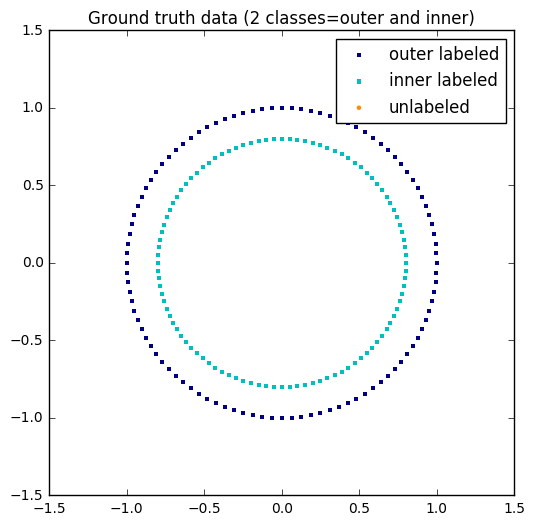

In [3]:
# Plot the ground truth data
# Outer: Navy, Inner: Cyan and Unlabeled: Dark Orange
plt.figure(figsize=(6, 6))
plt.scatter(X[y == outer, 0], X[y == outer, 1], color='navy',
            marker='s', lw=0, label="outer labeled", s=10)
plt.scatter(X[y == inner, 0], X[y == inner, 1], color='c',
            marker='s', lw=0, label='inner labeled', s=10)
plt.scatter(X[y == unlabeled, 0], X[y == unlabeled, 1], color='darkorange',
            marker='.', label='unlabeled')
plt.legend(scatterpoints=1, shadow=False, loc='upper right')
plt.title("Ground truth data (2 classes=outer and inner)")

### Generate Input Data for Label Propagation

In [4]:
# Create semi-supervised data
# Set all the labels of all points to be unknown except one point from outer circle 
# and one from inner circle
labels = -np.ones(n_samples)
# Pick first point in X from inner circle for supervision
inner_index = np.where(y == inner)[0][0]
# Pick last point in X from outer circle for supervision
outer_index = np.where(y == outer)[0][-1]
labels[outer_index] = outer
labels[inner_index] = inner

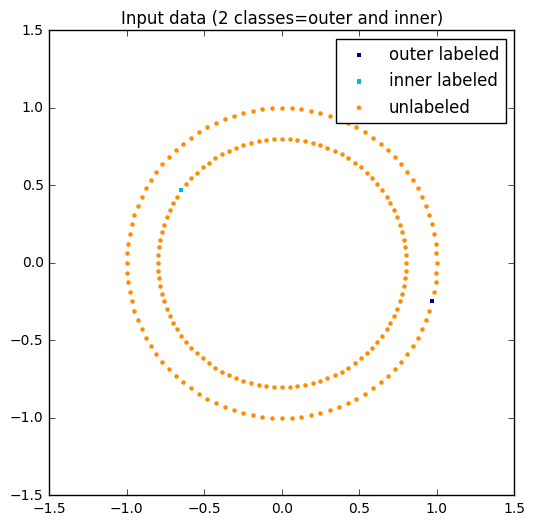

In [5]:
# Plot the input data for Label Propagation
# Outer: Navy, Inner: Cyan and Unlabeled: Dark Orange
plt.figure(figsize=(6, 6))
plt.scatter(X[labels == outer, 0], X[labels == outer, 1], color='navy',
            marker='s', lw=0, label="outer labeled", s=10)
plt.scatter(X[labels == inner, 0], X[labels == inner, 1], color='c',
            marker='s', lw=0, label='inner labeled', s=10)
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], color='darkorange',
            marker='.', label='unlabeled')
plt.legend(scatterpoints=1, shadow=False, loc='upper right')
plt.title("Input data (2 classes=outer and inner)")

### Learn with LabelSpreading


In [6]:
# http://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html#sklearn.semi_supervised.LabelSpreading
# Initialize
# rbf: gamma=2 : All inner, gamma>=5 : Half and half
# knn: n_neighbors=2 : All outer, n_neighbors=3 : Near inner supervised point, alternating labels
# n_neighbors>=5 : Correct label assignment
label_spread = label_propagation.LabelSpreading(kernel='knn', gamma=5, n_neighbors=5, alpha=1.0)
# Spread the known labels
label_spread.fit(X, labels)

LabelSpreading(alpha=1.0, gamma=5, kernel='knn', max_iter=30, n_neighbors=5,
        tol=0.001)

In [7]:
output_labels = label_spread.transduction_

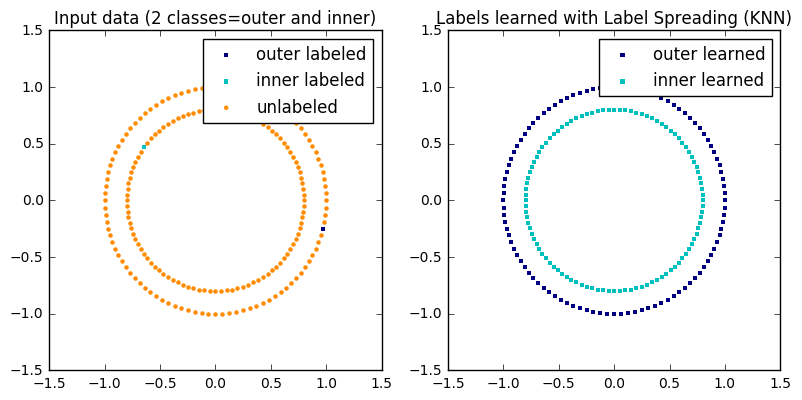

In [8]:
# Plot the input data and data with output predictions
# Outer or 0 Label: Navy, Inner or 1 Label: Cyan and Unlabeled: Dark Orange
plt.figure(figsize=(8.5, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[labels == outer, 0], X[labels == outer, 1], color='navy',
            marker='s', lw=0, label="outer labeled", s=10)
plt.scatter(X[labels == inner, 0], X[labels == inner, 1], color='c',
            marker='s', lw=0, label='inner labeled', s=10)
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], color='darkorange',
            marker='.', label='unlabeled')
plt.legend(scatterpoints=1, shadow=False, loc='upper right')
plt.title("Input data (2 classes=outer and inner)")

plt.subplot(1, 2, 2)
output_label_array = np.asarray(output_labels)
outer_numbers = np.where(output_label_array == outer)[0]
inner_numbers = np.where(output_label_array == inner)[0]
plt.scatter(X[outer_numbers, 0], X[outer_numbers, 1], color='navy',
            marker='s', lw=0, s=10, label="outer learned")
plt.scatter(X[inner_numbers, 0], X[inner_numbers, 1], color='c',
            marker='s', lw=0, s=10, label="inner learned")
plt.legend(scatterpoints=1, shadow=False, loc='upper right')
plt.title("Labels learned with Label Spreading (KNN)")

plt.subplots_adjust(left=0.07, bottom=0.07, right=0.93, top=0.92)
plt.show()